In [1]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('data/heart-disease.csv') 
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
X = heart_disease.drop("target",axis = 1)
Y = heart_disease['target']

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [4]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2)

In [6]:
clf.fit(X_train,y_train);

In [7]:
y_preds = clf.predict(X_test)

In [8]:
y_preds

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [9]:
y_test

135    1
33     1
126    1
18     1
156    1
      ..
65     1
44     1
143    1
280    0
250    0
Name: target, Length: 61, dtype: int64

In [10]:
clf.score(X_train,y_train)

1.0

In [11]:
clf.score(X_test,y_test)

0.8360655737704918

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [13]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accruacy on test set: {model.score(X_test, y_test)}")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.8360655737704918

Trying model with 20 estimators...
Model accruacy on test set: 0.8360655737704918

Trying model with 30 estimators...
Model accruacy on test set: 0.8524590163934426

Trying model with 40 estimators...
Model accruacy on test set: 0.8032786885245902

Trying model with 50 estimators...
Model accruacy on test set: 0.8688524590163934

Trying model with 60 estimators...
Model accruacy on test set: 0.819672131147541

Trying model with 70 estimators...
Model accruacy on test set: 0.8360655737704918

Trying model with 80 estimators...
Model accruacy on test set: 0.8360655737704918

Trying model with 90 estimators...
Model accruacy on test set: 0.8360655737704918



In [14]:
from sklearn.model_selection import cross_val_score

# Try different numbers of estimators with cross-validation and no cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accruacy on test set: {model.score(X_test, y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, Y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accruacy on test set: 0.8524590163934426
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accruacy on test set: 0.8032786885245902
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accruacy on test set: 0.8524590163934426
Cross-validation score: 82.8142076502

In [15]:
import pickle

# Save trained model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test,y_test)

0.819672131147541

In [17]:
import matplotlib.pyplot as plt

In [18]:
## getting the data ready 
# 3 main steps:
# 1. split the data into features and labels (usually 'X' and 'y')
#2. filling (imputing) or disregarding missing values
#3. converting not numerical values to numerical (called feature encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop('target',axis = 1)

In [21]:
y = heart_disease['target']

In [22]:
# split the data into training/testing

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
# make sure its all numerical

In [26]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
len(car_sales)

1000

In [27]:
#split the data

In [28]:
x = car_sales.drop('Price',axis = 1)
y = car_sales['Price']

In [29]:
#training/test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2)

In [30]:
#build ml model

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
model = RandomForestRegressor()

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()

In [34]:
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder = 'passthrough')

In [35]:
transformed_x = transformer.fit_transform(x)

In [36]:
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
#refil the model
np.random.seed(12)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

In [39]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
model.score(x_test,y_test)

0.19797644928196145

In [41]:
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [42]:
# missing data - > fill the spaces with some value
# remove the samples with missing data

In [43]:
car_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
car_missing.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# x and y

x = car_missing.drop('Price',axis = 1)
y = car_missing['Price']

In [46]:
# data to numbers:

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder = 'passthrough')
transformed_x = transformer.fit_transform(x)

In [48]:
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [49]:
# fill missing data with pandas

In [50]:
#fill the Make column

In [51]:
car_missing['Make'] =  car_missing['Make'].fillna('missing')
car_missing['Colour'] =  car_missing['Colour'].fillna('missing')
car_missing['Odometer (KM)'] = car_missing['Odometer (KM)'].fillna(car_missing['Odometer (KM)'].mean())
car_missing['Doors'] = car_missing['Doors'].fillna(4)

In [52]:
car_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [53]:
# remove missing price
car_missing.dropna(inplace = True)

In [54]:
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
len(car_missing)

950

In [56]:
x = car_missing.drop('Price',axis = 1)
y = car_missing['Price']

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder = 'passthrough')
transformed_x = transformer.fit_transform(car_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [58]:
# option 2: fill missing values with scikit-learn
car_missing_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')

In [59]:
car_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [60]:
car_missing_missing.dropna(subset = ['Price'],inplace = True)

In [61]:
car_missing_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [62]:
# x and y 
x = car_missing_missing.drop(['Price'],axis=1)

In [63]:
y = car_missing_missing['Price']

In [64]:
from sklearn.impute import SimpleImputer #missing with sklearn -> imputation
from sklearn.compose import ColumnTransformer

#fill categorical with missing and numerical with mean

In [65]:
cat_imputer =SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

#define columns

cat_features = ['Make','Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

#create an imputer (something that fills missing data)
imputer  = ColumnTransformer ([("cat_imputer",cat_imputer,cat_features),
                              ("door_imputer",door_imputer,door_feature),
                               ("num_imputer",num_imputer,num_features)
                              ])
                        

In [66]:
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [67]:
car_sales_filled = pd.DataFrame(filled_x,columns = ['Make','Colours','Doors','Odometer (KM)'])
type(car_sales_filled)

pandas.core.frame.DataFrame

In [68]:
car_sales_filled.isna().sum()


Make             0
Colours          0
Doors            0
Odometer (KM)    0
dtype: int64

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colours','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder = 'passthrough')
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [70]:
np.random.seed(12)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.4)

In [71]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.1345954323411751

In [72]:
x = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7868852459016393

In [74]:
#make predictions with ml models


In [75]:
#use a trained model to make prdictions


In [76]:
#2 ways:
#   predict() or predict_proba()

In [77]:
model.predict(x_test)

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [78]:
np.array([y_test])

array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]], dtype=int64)

In [79]:
y_preds = model.predict(X_test)
np.mean(y_preds==y_test)

0.5901639344262295

In [80]:
model.score(x_test,y_test)

0.7868852459016393

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.5901639344262295

In [82]:
#predict_proba() returns probabiliities of classification label

In [83]:
model.predict_proba(x_test[:10])

array([[0.96, 0.04],
       [0.3 , 0.7 ],
       [0.07, 0.93],
       [0.  , 1.  ],
       [0.16, 0.84],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.04, 0.96],
       [0.44, 0.56],
       [0.54, 0.46]])

In [84]:
model.predict(x_test[:6])

array([0, 1, 1, 1, 1, 0], dtype=int64)

In [85]:
y_preds[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [86]:
np.array(y_test[:10])

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [87]:
len(y_preds)   

61

In [88]:
len(y_test)

61

In [89]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

x = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
model.score(x_test,y_test)

0.8524590163934426

In [91]:
cross_val_score(model,x,y,cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [92]:
model_single_score = model.score(x_test,y_test)
model_cross_val_score = np.mean(cross_val_score(model,x,y,cv = 5))
model_single_score,model_cross_val_score

(0.8524590163934426, 0.8183606557377049)

In [93]:
cross_val_score(model,x,y,cv=5,scoring=None)

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

model = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(model,x,y,cv=5)

In [95]:
print(f"Classifier cross-validated accuracy: {np.mean(cross_val_score)*100:.2f}%")

Classifier cross-validated accuracy: 82.48%


In [96]:
# ROC curve

In [97]:
#true negative - model predicts 0 when truth is 0
#false negative - model predicts 0 when truth is 1
#true positive - model predicts 1 when truth is 1
#false positive - model predicts 1 when truth is 0

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)


RandomForestClassifier()

In [98]:
from sklearn.metrics import roc_curve

#make predictions with probabilities

y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.6 , 0.4 ],
       [0.23, 0.77],
       [0.03, 0.97],
       [0.09, 0.91],
       [0.1 , 0.9 ],
       [0.84, 0.16],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.92, 0.08]])

In [99]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.4 , 0.77, 0.97, 0.91, 0.9 , 0.16, 0.95, 0.  , 0.08])

In [100]:
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)


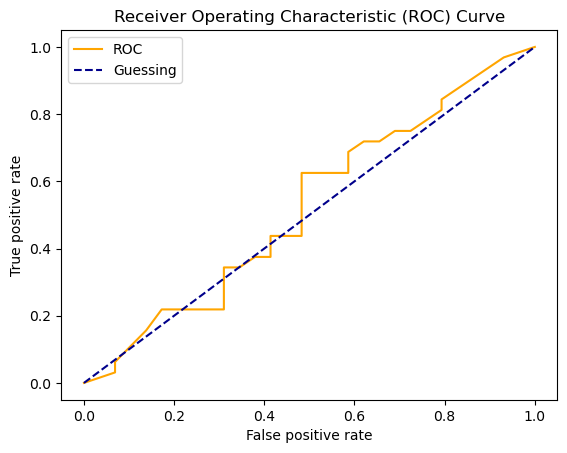

In [101]:
# create function from plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color = 'orange',label = 'ROC')
    plt.plot([0,1],[0,1],color = 'darkblue',linestyle = '--',label = 'Guessing')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [102]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.5242456896551724

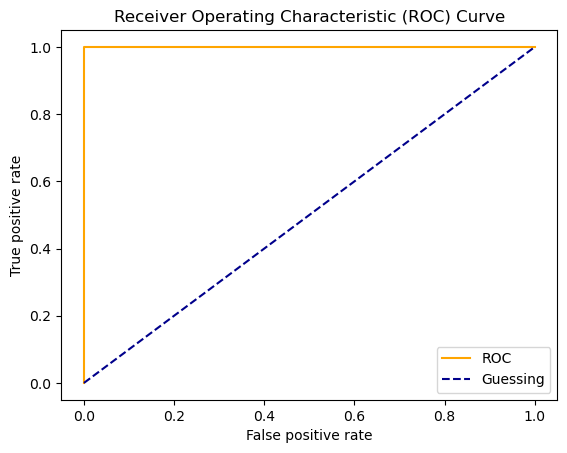

In [103]:
# roc perfect roc curve and auc score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)


In [104]:
roc_auc_score(y_test,y_test)

1.0

In [105]:
# confusion matrix

#A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

from sklearn.metrics import confusion_matrix   

In [106]:
y_preds = model.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[15, 14],
       [15, 17]], dtype=int64)

In [107]:
pd.crosstab(y_test,y_preds,rownames = ['Actual Labels'],colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,15,14
1,15,17


<Axes: >

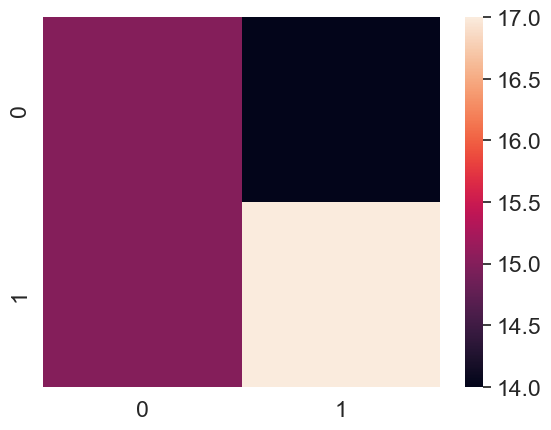

In [108]:
#make our confusion matrix more visual with seaborn's heatmap()
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)


In [109]:
import sklearn
sklearn.__version__

'1.5.1'

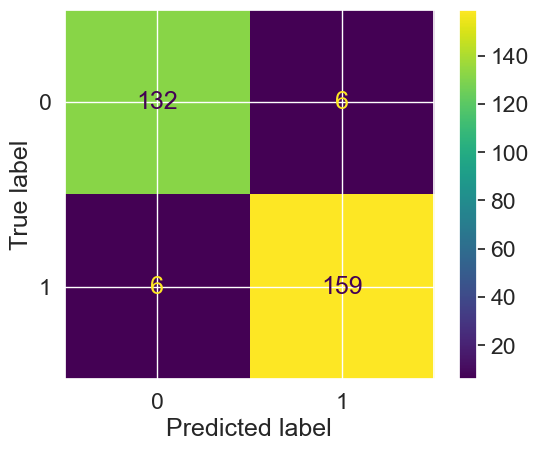

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model,X=x,y=y)

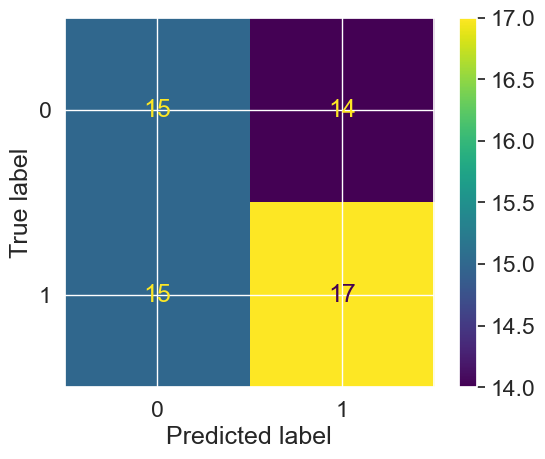

In [111]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        29
           1       0.55      0.53      0.54        32

    accuracy                           0.52        61
   macro avg       0.52      0.52      0.52        61
weighted avg       0.53      0.52      0.52        61



In [113]:
diesease_true = np.zeros(10000)
diesease_true[0] = 1

diesease_preds = np.zeros(10000)
pd.DataFrame(classification_report(diesease_true,diesease_preds,output_dict=True))

c:\Users\vyoto\desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vyoto\desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vyoto\desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [114]:
#regression model evaluation metrics



In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
x = heart_disease.drop('target',axis = 1)
y = heart_disease['target']
model = RandomForestClassifier(n_estimators=100)



In [116]:
cv_acc = cross_val_score(model,x,y,cv=5)


In [117]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [118]:
print(f'accuracy:{cv_acc.mean()*100:.2f}')
print(f'accuaracy: {np.mean(cv_acc)*100:.2f}')

accuracy:82.48
accuaracy: 82.48


In [119]:
#precision
cv_precision = cross_val_score(model,x,y,cv=5,scoring='precision')
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [120]:
print(f"precision: {np.mean(cv_precision)}")

precision: 0.8085601538512754


In [121]:
# recall
cv_recall = cross_val_score(model,x,y,cv = 5,scoring = 'recall')
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [122]:
print(f'Recall: {np.mean(cv_recall)}')

Recall: 0.8424242424242424


In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

In [124]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print(f'accuaracy: {accuracy_score(y_test,y_preds)*100:.2f}%')

accuaracy: 85.25%


In [125]:
#imporving a model

# first prediction = baseline predictions.
# first model = baseline model

# Could we collect more data? (more data -> better)
# Could we imporve our data?



In [126]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [127]:
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                  'precision': round(precision,2),
                  'recall': round(recall,2),
                  'f1': round(f1,2)}
    print(f'Accuaracy: {accuracy*100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1: {f1:.2f}')
    return metric_dict



In [128]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease_shu = heart_disease.sample(frac=1)

x = heart_disease_shu.drop('target',axis = 1)
y = heart_disease_shu['target']
train_split = round(0.7*len(heart_disease_shu))
valid_split = round(train_split + 0.15*len(heart_disease_shu))
x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[valid_split:]
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_preds = model.predict(x_valid) #baseline predictions

#evaluate:
baseline_metrics = evaluate_preds(y_valid,y_preds)

Accuaracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


In [129]:
np.random.seed(42)
model_2 = RandomForestClassifier(n_estimators=100)
model_2.fit(x_train,y_train)

#predictions:
y_preds_2 = model_2.predict(x_valid)
#evaluate
model_2_metrics = evaluate_preds(y_valid,y_preds_2)


Accuaracy: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


In [130]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500,1000,1200],
        'max_depth':[None,5,10,20,30],
        'max_features':["auto",'sqrt'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4]}

np.random.seed(42)

x = heart_disease_shu.drop('target',axis = 1)
y = heart_disease_shu['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

model = RandomForestClassifier(n_jobs=1)

rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions = grid,
                              n_iter=50,
                              cv=5,
                              verbose=2)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

c:\Users\vyoto\desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vyoto\desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vyoto\desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\vyoto\desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    vali

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [131]:
rs_y_preds = rs_model.predict(x_test)
rs_metrics = evaluate_preds(y_test,rs_y_preds)


Accuaracy: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


In [133]:
import pickle

pickle.dump(rs_model,open('saving_ml_model.pkl','wb'))

In [135]:
loaded_model = pickle.load(open('saving_ml_model.pkl','rb'))


In [136]:
new_model_preds = loaded_model.predict(x_test)
evaluate_preds(y_test,new_model_preds)

Accuaracy: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

In [138]:
from joblib import load,dump

dump(rs_model,filename='saving_ml_model_2.joblib')

['saving_ml_model_2.joblib']

In [139]:
loaded_joblib_model = load(filename='saving_ml_model_2.joblib')

In [140]:
joblob_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test,joblob_preds)

Accuaracy: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

In [141]:
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [143]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [144]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64